<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/1_Car_Price_Estimation_Using_Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *1. Import libraries and dataset*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
car_df=pd.read_csv('/Users/maegbug/Desktop/Car_Purchasing_Data.csv',encoding='ISO-8859-1')

In [ ]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
car_df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


#   

# *2.Data Visualization*

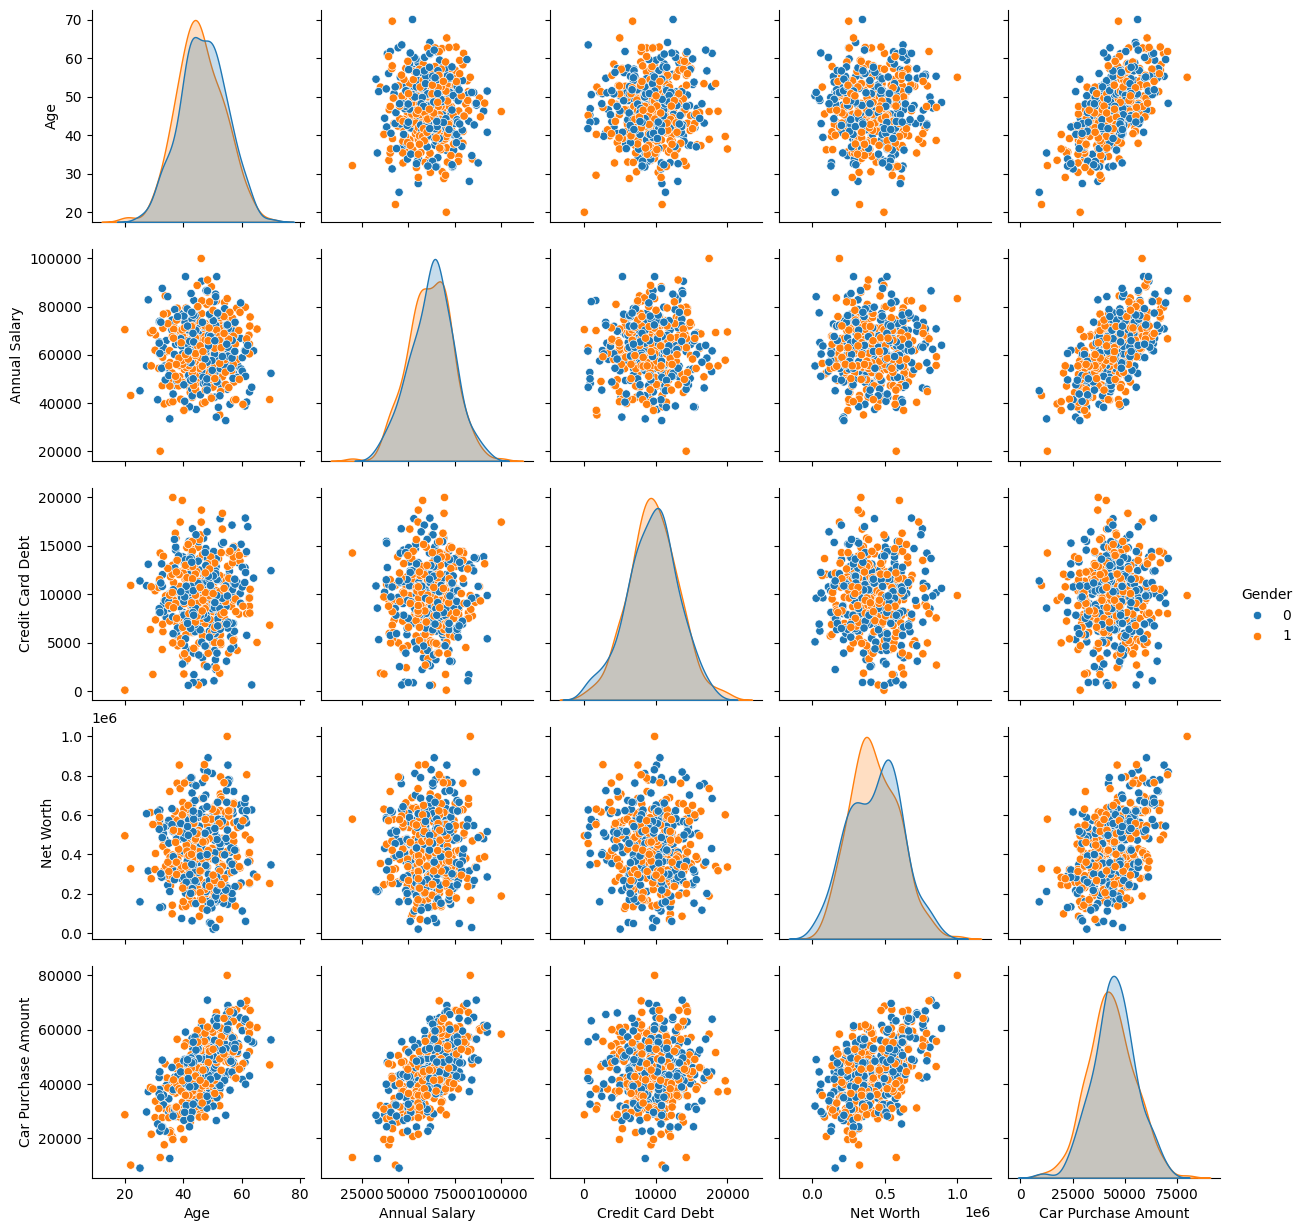

In [ ]:
sns.pairplot(car_df,hue='Gender')

#

# *3. Data Cleaning*

In [ ]:
X=car_df.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'],axis=1)

In [ ]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [ ]:
Y=car_df['Car Purchase Amount']

In [ ]:
Y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [ ]:
X.shape

(500, 5)

In [ ]:
Y.shape

(500,)

In [ ]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(500, 5)

In [ ]:
Y=Y.values.reshape(-1,1)

In [ ]:
Y.shape

(500, 1)

In [ ]:
Y_scaled=scaler.fit_transform(Y)

#

# *4. Spliting Data*

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test =train_test_split(X_scaled,Y_scaled,test_size=0.3)

In [ ]:
X_train.shape

(350, 5)

In [ ]:
X_test.shape

(150, 5)

#

# *4. Model Training*

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(25,input_dim=5, activation ='relu'))
model.add(Dense(25, activation ='relu'))
model.add(Dense(1,activation ='linear'))

2024-08-02 10:44:38.735457: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826 (3.23 KB)

 Trainable params: 826 (3.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
epochs_hist=model.fit(X_train,Y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1338 - val_loss: 0.0108
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0114 - val_loss: 0.0046
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - val_loss: 0.0033
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 7.1952e-04
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1242e-04 - val_loss: 6.5706e-04
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1659e-04 - val_loss: 3.0799e-04
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0093e-04 - val_loss: 2.8360e-04
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8341e-04 - val_loss: 2.0181e-04
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0326e-04 - val_loss: 2.2241e-04
Epoch 12/100
94/94 

#

# *5. Model Evaluation*

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

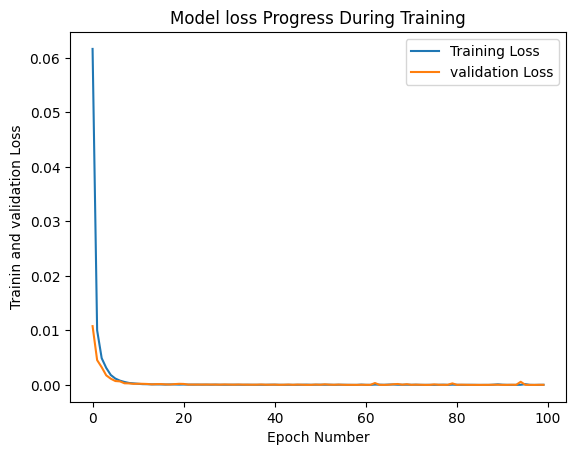

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss Progress During Training')
plt.ylabel('Trainin and validation Loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss','validation Loss'])

In [ ]:
# Gender,Age, Annual salary, credit card debit, net worth

y_predict=model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [ ]:
print('Expected purchase ammount',y_predict)

Expected purchase ammount [[0.42338985]
 [0.7121977 ]
 [0.5543266 ]
 [0.7755405 ]
 [0.55119216]
 [0.26388884]
 [0.24376796]
 [0.4777628 ]
 [0.7605538 ]
 [0.3767601 ]
 [0.52376044]
 [0.28486413]
 [0.73912275]
 [0.37390825]
 [0.52281   ]
 [0.46982846]
 [0.4657807 ]
 [0.56486875]
 [0.52638364]
 [0.4857915 ]
 [0.5208424 ]
 [0.54351777]
 [0.20319353]
 [0.6161018 ]
 [0.32916948]
 [0.21074267]
 [0.44835988]
 [0.30532792]
 [0.42939606]
 [0.40910706]
 [0.57504255]
 [0.42721894]
 [0.5477316 ]
 [0.26152298]
 [0.26541355]
 [0.4738221 ]
 [0.56101775]
 [0.28643513]
 [0.43461975]
 [0.76757413]
 [0.577338  ]
 [0.47461492]
 [0.37598783]
 [0.31559142]
 [0.3954605 ]
 [0.5141758 ]
 [0.47729942]
 [0.66244763]
 [0.4746957 ]
 [0.46045235]
 [0.53976953]
 [0.16537587]
 [0.62711084]
 [0.6763954 ]
 [0.24737047]
 [0.35394576]
 [0.5994783 ]
 [0.6127145 ]
 [0.39733413]
 [0.6982516 ]
 [0.33649796]
 [0.60457027]
 [0.50055265]
 [0.38204435]
 [0.5571979 ]
 [0.41887304]
 [0.61441183]
 [0.5476522 ]
 [0.4690439 ]
 [0.2980

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, Y_test, verbose=0)
print(f'Loss (e.g., MSE): {loss:.4f}')

# For MAE, RMSE:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')


Loss (e.g., MSE): 0.0000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAE: 0.0029
MSE: 0.0000
RMSE: 0.0062


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


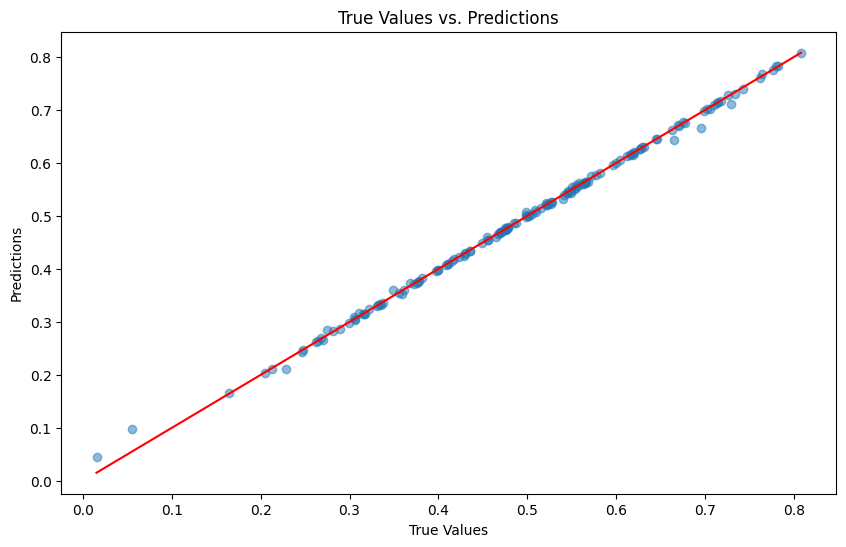

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true values and predictions respectively
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')  # Diagonal line for reference
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, median_absolute_error

# Assuming y_test and y_pred are your true values and predictions respectively
r2 = r2_score(Y_test, y_pred)
mape = mean_absolute_percentage_error(Y_test, y_pred)
median_ae = median_absolute_error(Y_test, y_pred)

print(f'R-squared: {r2:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'Median Absolute Error: {median_ae:.4f}')


R-squared: 0.9984
MAPE: 0.0234
Median Absolute Error: 0.0013


In [ ]:
p=np.array([[1, 50,79988,10000, 548000]])
pred=model.predict(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
#1	58.271369	79370.03798	14426.164850	548599.0524	67422.36313
print('Expected purchase ammount',pred)

Expected purchase ammount [[164641.66]]


In [ ]:
result = np.hstack((y_pred, Y_test))
result

array([[0.42338985, 0.4237175 ],
       [0.71219772, 0.71302854],
       [0.55432659, 0.55076214],
       [0.77554047, 0.77672238],
       [0.55119216, 0.55421359],
       [0.26388884, 0.26493265],
       [0.24376796, 0.24646921],
       [0.47776279, 0.47698891],
       [0.76055378, 0.76168793],
       [0.3767601 , 0.37779655],
       [0.52376044, 0.52080458],
       [0.28486413, 0.27413582],
       [0.73912275, 0.7427002 ],
       [0.37390825, 0.3754806 ],
       [0.52280998, 0.52378641],
       [0.46982846, 0.47053558],
       [0.46578071, 0.46675557],
       [0.56486875, 0.56647918],
       [0.52638364, 0.52751195],
       [0.4857915 , 0.48459001],
       [0.52084237, 0.52189581],
       [0.54351777, 0.54497514],
       [0.20319353, 0.20447774],
       [0.6161018 , 0.61669253],
       [0.32916948, 0.33068236],
       [0.21074267, 0.22891454],
       [0.44835988, 0.44900269],
       [0.30532792, 0.3059129 ],
       [0.42939606, 0.42962519],
       [0.40910706, 0.41053254],
       [0.